In [1]:
# Import math related packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Import OpenCV
import cv2 as cv

# Import other packages
import glob
import os
import pandas as pd


# Xiaoyue's code for analyzing single chosen corner

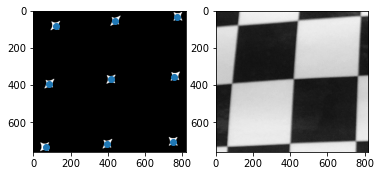

In [21]:
# Load image 
img = cv.imread("/Users/jasonyuan/Desktop/Pressure Test Trial 2/DSC07732.JPG")

# Convert to grayscale and crop out the region of interest 
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cropped = gray[1800:2560,3400:4220] # crop region

# Image processing
blurred = cv.GaussianBlur(cropped, (35, 35), 0) # blur kernel can be changed
block_size = 30
aperture_size = 9
dst = cv.cornerHarris(blurred, block_size, aperture_size, 0.15) # block_size, aperture_size, and threshold (0.15 here) can be changed
ret, dst = cv.threshold(dst,0.01*dst.max(),255,0)
dst = np.uint8(dst)

# find centroids
ret, labels, stats, centroids = cv.connectedComponentsWithStats(dst)

# define the criteria to stop and refine the corners
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv.cornerSubPix(cropped,np.float32(centroids),(5,5),(-1,-1),criteria)
corners = np.array(corners)

%matplotlib inline
plt.subplot(1,2,1)
plt.imshow(dst, cmap='gray')
plt.scatter(corners[1:,0],corners[1:,1])

plt.subplot(1,2,2)
plt.imshow(cropped,cmap='gray')

DSC07732.JPG
DSC07733.JPG
DSC07734.JPG
DSC07735.JPG
DSC07736.JPG
DSC07737.JPG
DSC07738.JPG
DSC07739.JPG
DSC07740.JPG
DSC07741.JPG
DSC07742.JPG
DSC07743.JPG
DSC07744.JPG
DSC07745.JPG
DSC07746.JPG
DSC07747.JPG
DSC07748.JPG
DSC07749.JPG
DSC07750.JPG
DSC07751.JPG
DSC07752.JPG
DSC07753.JPG
DSC07754.JPG
DSC07755.JPG
DSC07756.JPG
DSC07757.JPG
DSC07758.JPG
DSC07759.JPG
DSC07760.JPG
DSC07761.JPG
DSC07762.JPG
DSC07763.JPG
DSC07764.JPG
DSC07765.JPG
DSC07766.JPG
DSC07767.JPG
DSC07768.JPG
DSC07769.JPG
DSC07770.JPG
DSC07771.JPG
DSC07772.JPG
DSC07773.JPG
DSC07774.JPG
DSC07775.JPG
DSC07776.JPG
DSC07777.JPG
DSC07778.JPG
DSC07779.JPG
DSC07780.JPG
DSC07781.JPG
DSC07782.JPG
DSC07783.JPG
DSC07784.JPG
DSC07785.JPG
DSC07786.JPG
DSC07787.JPG
DSC07788.JPG
DSC07789.JPG
DSC07790.JPG
DSC07791.JPG
DSC07792.JPG
DSC07793.JPG
DSC07794.JPG
DSC07795.JPG
DSC07796.JPG
DSC07797.JPG
DSC07798.JPG
DSC07799.JPG
DSC07800.JPG
DSC07801.JPG
DSC07802.JPG
DSC07803.JPG
DSC07804.JPG
DSC07805.JPG
DSC07806.JPG
DSC07807.JPG
DSC07808.JPG

<IPython.core.display.Javascript object>


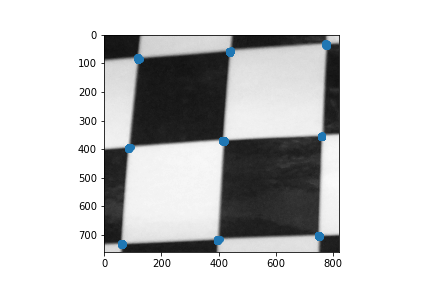

In [22]:
corners_=[]
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.001)

os.chdir("/Users/jasonyuan/Desktop/Pressure Test Trial 2")
files = sorted(glob.glob("DSC*.JPG"))
for file in files:
    print(file)
    img = cv.imread(file)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    
    cropped = gray[1800:2560,3400:4220]
    blurred = cv.GaussianBlur(cropped, (35, 35), 0)
    dst = cv.cornerHarris(blurred, block_size, aperture_size, 0.15)
    ret, dst = cv.threshold(dst,0.01*dst.max(),255,0)
    dst = np.uint8(dst)
    
    # find centroids
    ret, labels, stats, centroids = cv.connectedComponentsWithStats(dst)
    #plt.scatter(centroids[1,0], centroids[1,1], c='r')
    
    # define the criteria to stop and refine the corners
    corners = cv.cornerSubPix(cropped,np.float32(centroids)[1:],(5,5),(-1,-1),criteria)
    corners_.append(corners)
    
%matplotlib notebook
corners_box=np.vstack(corners_)
plt.imshow(cropped, cmap='gray')
plt.scatter(corners_box[:,0], corners_box[:,1])

In [23]:
print(corners_)
print(corners_box)

[array([[776.0546  ,  33.52165 ],
       [441.282   ,  56.793293],
       [119.09239 ,  82.78678 ],
       [757.04126 , 354.86462 ],
       [417.18027 , 369.66785 ],
       [ 83.54798 , 395.95786 ],
       [750.876   , 707.2936  ],
       [398.2132  , 715.15625 ],
       [ 66.20914 , 732.72894 ]], dtype=float32), array([[774.1435  ,  32.562374],
       [441.36594 ,  56.685364],
       [119.07676 ,  82.60845 ],
       [759.5376  , 354.54803 ],
       [417.37173 , 369.85513 ],
       [ 87.17391 , 393.62833 ],
       [750.64777 , 702.1892  ],
       [398.54755 , 714.9903  ],
       [ 62.240444, 734.5653  ]], dtype=float32), array([[775.579   ,  33.271526],
       [441.23386 ,  56.897293],
       [116.919785,  85.56877 ],
       [762.2328  , 353.28482 ],
       [419.2347  , 373.7416  ],
       [ 87.3527  , 393.6549  ],
       [750.50757 , 702.329   ],
       [398.48325 , 715.09406 ],
       [ 60.765347, 731.8404  ]], dtype=float32), array([[771.7337  ,  33.69976 ],
       [441.26456 ,  56.

# Plot points onto the image and find the oscillation in points

In [24]:
corners_dict = {}
for n in range(9):
    idx = [m for m in range(n,corners_box.shape[0],9)]
    corners_dict["C{:d}".format(n+1)] = corners_box[idx,:]
    
print(corners_dict)

# c1_idx = [n for n in range(0,corners_box.shape[0],9)]
# c2_idx = [n for n in range(1,corners_box.shape[0],9)]
# c3_idx = [n for n in range(2,corners_box.shape[0],9)]
# c4_idx = [n for n in range(3,corners_box.shape[0],9)]
# c5_idx = [n for n in range(4,corners_box.shape[0],9)]
# c6_idx = [n for n in range(5,corners_box.shape[0],9)]
# c7_idx = [n for n in range(6,corners_box.shape[0],9)]
# c8_idx = [n for n in range(7,corners_box.shape[0],9)]
# c9_idx = [n for n in range(8,corners_box.shape[0],9)]

# print(len(c1_idx))
# print(len(c2_idx))
# print(len(c3_idx))
# print(len(c4_idx))
# print(len(c5_idx))
# print(len(c6_idx))
# print(len(c7_idx))
# print(len(c8_idx))
# print(len(c9_idx))

{'C1': array([[776.0546  ,  33.52165 ],
       [774.1435  ,  32.562374],
       [775.579   ,  33.271526],
       [771.7337  ,  33.69976 ],
       [773.8584  ,  36.12963 ],
       [775.84296 ,  35.42889 ],
       [775.53204 ,  34.48004 ],
       [776.2944  ,  33.74026 ],
       [776.11646 ,  37.34654 ],
       [774.7328  ,  34.219933],
       [772.67426 ,  33.952065],
       [774.0187  ,  31.737658],
       [774.4294  ,  34.15371 ],
       [772.4203  ,  32.39088 ],
       [778.44714 ,  34.103542],
       [773.8611  ,  33.116558],
       [774.42584 ,  32.41411 ],
       [774.4948  ,  33.705994],
       [775.1666  ,  33.089317],
       [774.684   ,  32.90097 ],
       [776.28296 ,  33.552227],
       [774.49817 ,  32.323067],
       [775.261   ,  34.08452 ],
       [775.3861  ,  33.626945],
       [774.62463 ,  32.288773],
       [775.14484 ,  33.31503 ],
       [775.7498  ,  34.107986],
       [774.90717 ,  33.163105],
       [774.8515  ,  31.70912 ],
       [775.3621  ,  32.438747],
   

<IPython.core.display.Javascript object>


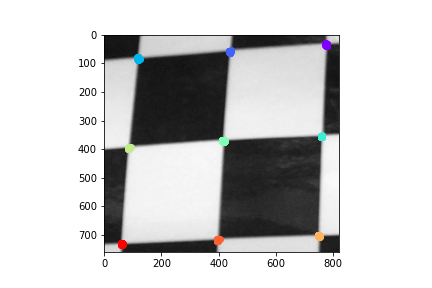

In [25]:
plt.figure()
plt.imshow(cropped,cmap='gray')
colors = cm.rainbow(np.linspace(0,1,9))
for n,c in zip(range(9),colors):
#     print(n)
#     print(c)
    plt.scatter(corners_dict["C{:d}".format(n+1)][:,0],corners_dict["C{:d}".format(n+1)][:,1],color=c)

plt.savefig("/Users/jasonyuan/Desktop/corners_location.png")
plt.show()

<IPython.core.display.Javascript object>


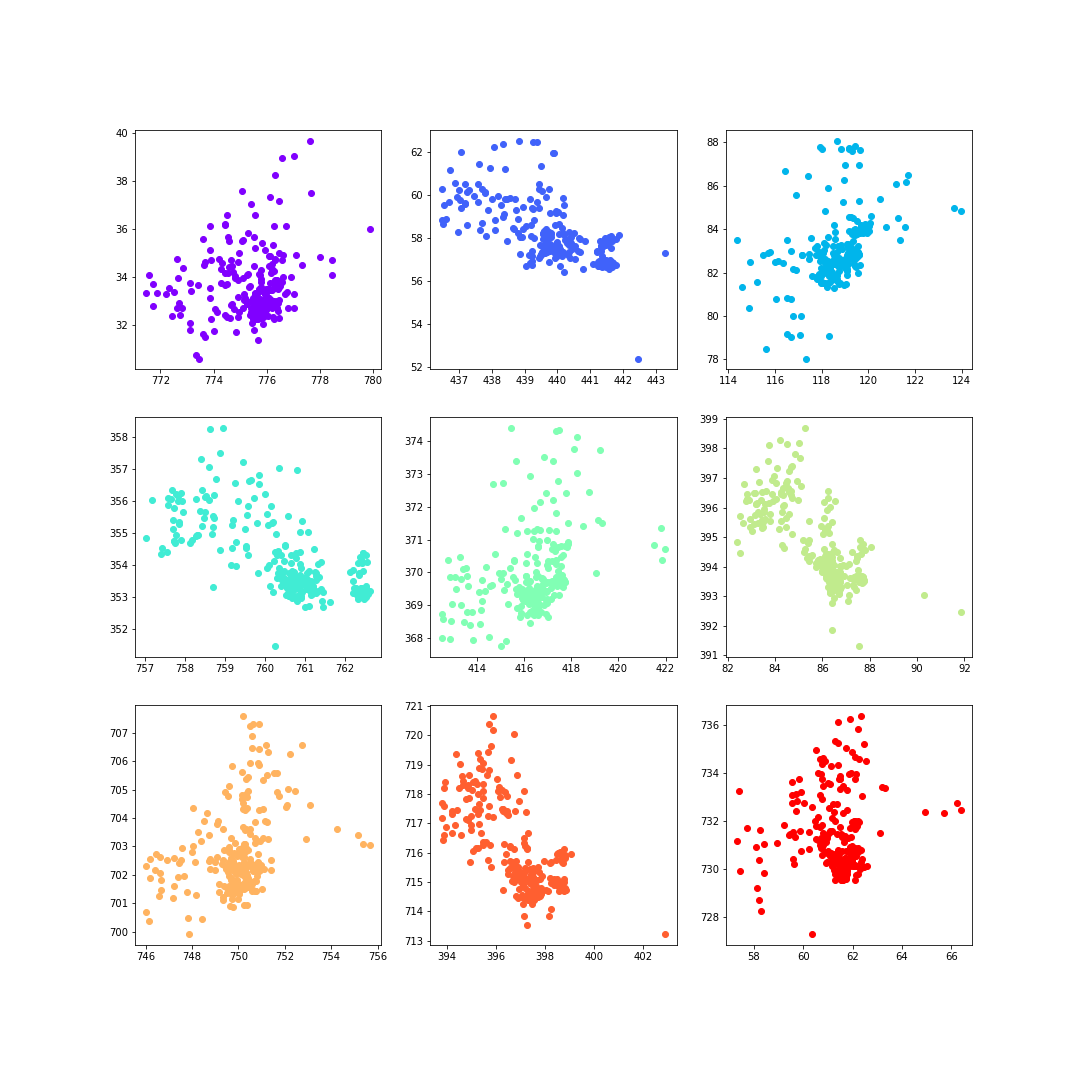

In [26]:
plt.figure(figsize=(15,15))
for n,c in zip(range(9),colors):
#     print(n)
#     print(c)
    plt.subplot(3,3,n+1)
    plt.scatter(corners_dict["C{:d}".format(n+1)][:,0],corners_dict["C{:d}".format(n+1)][:,1],color=c)

plt.savefig("/Users/jasonyuan/Desktop/corner_variation.png")
plt.show()

In [27]:
# Calculate the individual STD of each set of corners
avg_coord = []
for n in range(9):
    corner_pts = corners_dict["C{:d}".format(n+1)]
    x_avg = np.mean(corner_pts[:,0])
    y_avg = np.mean(corner_pts[:,1])
    pt_std_x = np.std(corner_pts[:,0])
    pt_std_y = np.std(corner_pts[:,1])
    
    print("C{:d}: Mean coordinate: ({:.3f},{:.3f}) | Standard Deviation: ({:.3f},{:.3f})".format(n+1,x_avg,y_avg,pt_std_x,pt_std_y))
    
    avg_coord.append([x_avg,y_avg])

    
avg_coord = np.array(avg_coord)

C1: Mean coordinate: (775.442,33.636) | Standard Deviation: (1.256,1.353)
C2: Mean coordinate: (439.905,58.143) | Standard Deviation: (1.436,1.416)
C3: Mean coordinate: (118.710,82.992) | Standard Deviation: (1.243,1.562)
C4: Mean coordinate: (760.443,354.206) | Standard Deviation: (1.454,1.199)
C5: Mean coordinate: (416.412,369.932) | Standard Deviation: (1.479,1.213)
C6: Mean coordinate: (85.748,394.727) | Standard Deviation: (1.533,1.358)
C7: Mean coordinate: (749.987,702.780) | Standard Deviation: (1.415,1.453)
C8: Mean coordinate: (396.884,716.067) | Standard Deviation: (1.416,1.497)
C9: Mean coordinate: (61.320,731.372) | Standard Deviation: (1.179,1.576)


# Compute the Laplacian variance for the blur value

In [8]:
os.chdir("/Users/jasonyuan/Desktop/Pressure_Test_1")
files = sorted(glob.glob("DSC*.JPG"))
blur_dict = {}
for file in files:
    print(file)
    img = cv.imread(file)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    cropped = gray[1800:2560,3400:4220]
    
    blur = cv.Laplacian(cropped, cv.CV_64F).var()
    blur_dict[file.split(".")[0]] = [blur]

blur_table = pd.DataFrame(blur_dict)
blur_table.T.to_excel("/Users/jasonyuan/Desktop/Trial_1_Blur_values.xlsx")

DSC07462.JPG
DSC07463.JPG
DSC07464.JPG
DSC07465.JPG
DSC07466.JPG
DSC07467.JPG
DSC07468.JPG
DSC07469.JPG
DSC07470.JPG
DSC07471.JPG
DSC07472.JPG
DSC07473.JPG
DSC07474.JPG
DSC07475.JPG
DSC07476.JPG
DSC07477.JPG
DSC07478.JPG
DSC07479.JPG
DSC07480.JPG
DSC07481.JPG
DSC07482.JPG
DSC07483.JPG
DSC07484.JPG
DSC07485.JPG
DSC07486.JPG
DSC07487.JPG
DSC07488.JPG
DSC07489.JPG
DSC07490.JPG
DSC07491.JPG
DSC07492.JPG
DSC07493.JPG
DSC07494.JPG
DSC07495.JPG
DSC07496.JPG
DSC07497.JPG
DSC07498.JPG
DSC07499.JPG
DSC07500.JPG
DSC07501.JPG
DSC07502.JPG
DSC07503.JPG
DSC07504.JPG
DSC07505.JPG
DSC07506.JPG
DSC07507.JPG
DSC07508.JPG
DSC07509.JPG
DSC07510.JPG
DSC07511.JPG
DSC07512.JPG
DSC07513.JPG
DSC07514.JPG
DSC07515.JPG
DSC07516.JPG
DSC07517.JPG
DSC07518.JPG
DSC07519.JPG
DSC07520.JPG
DSC07521.JPG
DSC07522.JPG
DSC07523.JPG
DSC07524.JPG
DSC07525.JPG
DSC07526.JPG
DSC07527.JPG
DSC07528.JPG
DSC07529.JPG
DSC07530.JPG
DSC07531.JPG
DSC07532.JPG
DSC07533.JPG
DSC07534.JPG
DSC07535.JPG
DSC07536.JPG
DSC07537.JPG
DSC07538.JPG

In [11]:
blur_table.T.to_excel("/Users/jasonyuan/Desktop/Trial_1_Blur_values.xlsx")

# Playing around with rawpy

In [15]:
import rawpy 
import imageio

In [13]:
r_im = rawpy.imread("/Volumes/Untitled/DCIM/100MSDCF/DSC06825.ARW")
img = r_im.postprocess(gamma=(1,1), no_auto_bright=True, output_bps=16)

In [17]:
# %matplotlib inline
# plt.figure()
# plt.imshow(img)

R = img[:,:,0]
G = img[:,:,1]
B = img[:,:,2]

imageio.imsave('/Users/jasonyuan/Desktop/R.tif', R)
imageio.imsave('/Users/jasonyuan/Desktop/G.tif', G)
imageio.imsave('/Users/jasonyuan/Desktop/B.tif', B)